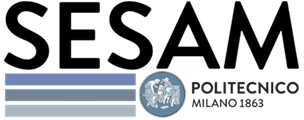

## Utopia Model - Planning Mode

### 1. Import of the Model

In [ ]:
from hypatia import Model
import os
from hypatia import Plotter

### 2. Create the model using as input the sets files

In [ ]:
Utopia = Model(
    path="examples/Planning_teaching/sets",                             # Path to the sets folder
    mode="Planning",                                                    # "Planning" or "Operation" mode
)

### 3. Create the parameters with default values

In [ ]:
Utopia.create_data_excels(
    path ='examples\Planning_teaching\parameters',                      # Path to the parameters folder
    force_rewrite=True                                                  # Overwrite the parameters files (True) or not (False)
)

### 4. Read the parameters

In [ ]:
Utopia.read_input_data("examples\Planning_teaching\parameters")         # Path to the parameters folder

### 5. Run the model to find the optimal solution

In [ ]:
Utopia.run(
    solver='gurobi',                                                    # Selection of the solver: 'GUROBI', 'CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCIPY', 'SCS’
    verbosity=True,
    force_rewrite= True                                                 # Overwrite the parameters files (True) or not (False)
)

### 6. Create the folder where to save the results

In [ ]:
os.mkdir("examples/Planning_teaching/results/")                         # Path to the results folder

### 7. Save the results as csv file in the previous folder

In [ ]:
Utopia.to_csv(
    path='examples/Planning_teaching/results',                          # Path to the destination folder for the results
    force_rewrite=True,                                                 # Overwrite the parameters files (True) or not (False)
    postprocessing_module="aggregated"                                  # "default" and "aggregated" are the two options
)

### 8. Create the configuration file for the plots

In [ ]:
Utopia.create_config_file(
    path = 'examples/Planning_teaching/config.xlsx'                     # Path to the config file
)

### 9. Read the configuration file

In [ ]:
plots = Plotter(
    results = Utopia,                                                   # Name of the Model
    config = 'examples/Planning_teaching/config.xlsx',                  # Path to the config file
    hourly_resolution = True,                                           # if model has an hourly resultion otherwise False
)

### 10. Create folder for the plots

In [ ]:
os.mkdir("examples/Planning_teaching/plots/") 

### 11. Create plots

In [ ]:
# Plot the total capacity of each technology in the tech_group in each year and save it in the plots folder

plots.plot_total_capacity(
    path = 'examples/Planning_teaching/plots/totalcapacity.html',       # Path to the folder in which the plot will be saved
    tech_group = 'Power Generation',                                    # The group of the techs, reported in the configuration file, to be plotted
    kind= "bar",                                                        # "Bar" or "Area" are the two kind of plots accepted
    decom_cap=True,                                                     # Decommissioning capacity can be included (True) or not (False)
    regions="all",                                                      # The regions considered. "all" to consider all of them, ["reg1", ...] to consider only some regions
    aggregate=False                                                     # True to aggregate the results of each region, False to plot them separately
)

In [ ]:
# Plot the new capacity of each technology in the tech_group in each year and save it in the plots folder 

plots.plot_new_capacity(
    path = 'examples/Planning_teaching/plots/newcapacity.html',         # Path to the folder in which the plot will be saved
    tech_group = 'Power Generation',                                    # The group of the techs, reported in the configuration file, to be plotted
    kind="bar",                                                         # "Bar" or "Area" are the two kind of plots accepted
    cummulative=False,                                                  # In each year the cummulative new capacity is plotted (True) or not (False)
    regions="all",                                                      # The regions considered. "all" to consider all of them, ["reg1", ...] to consider only some regions
    aggregate=False                                                     # True to aggregate the results of each region, False to plot them separately
)


In [ ]:
# Plot the annual production of each technology in the tech_group in each year and save it in the plots folder 

plots.plot_prod_by_tech(
    path = 'examples/Planning_teaching/plots/prod_by_tech.html',        # Path to the folder in which the plot will be saved
    tech_group = 'Power Generation',                                    # The group of the techs, reported in the configuration file, to be plotted
    kind="bar",                                                         # "Bar" or "Area" are the two kind of plots accepted
    regions="all",                                                      # The regions considered. "all" to consider all of them, ["reg1", ...] to consider only some regions
    aggregate=False                                                     # True to aggregate the results of each region, False to plot them separately
)

In [ ]:
# Plot the annual consumption of each carrier in the fuel_group in each year and save it in the plots folder 

plots.plot_use_by_technology(
    path = 'examples/Planning_teaching/plots/use_by_tech.html',         # Path to the folder in which the plot will be saved
    fuel_group = 'Oil',                                                 # The group of the carriers, reported in the configuration file, to be plotted
    kind="bar",                                                         # "Bar" or "Area" are the two kind of plots accepted
    regions="all",                                                      # The regions considered. "all" to consider all of them, ["reg1", ...] to consider only some regions
    aggregate=False                                                     # True to aggregate the results of each region, False to plot them separately
)

In [ ]:
# Plot as Pie chart the annual consumption and production of each carrier in the fuel_group for a specific year and save it in the plots folder

plots.plot_fuel_prod_cons(
    path = 'examples/Planning_teaching/plots/prod_con_share_2020.html',     # Path to the folder in which the plot will be saved
    years = ["Y0"],                                                         # Year considered 
    fuel_group = 'Electricity',                                             # The group of the carriers, reported in the configuration file, to be plotted
    trade=True,                                                             # Trade can be included (True) or not (False)
    regions="all",                                                          # The regions considered. "all" to consider all of them, ["reg1", ...] to consider only some regions
    aggregate=False                                                         # True to aggregate the results of each region, False to plot them separately
)

plots.plot_fuel_prod_cons(
    path = 'examples/Planning_teaching/plots/prod_con_share_2030.html',     # Path to the folder in which the plot will be saved
    years = ["Y10"],                                                        # Year considered 
    fuel_group = 'Electricity',                                             # The group of the carriers, reported in the configuration file, to be plotted
    trade=True,                                                             # Trade can be included (True) or not (False)
    regions="all",                                                          # The regions considered. "all" to consider all of them, ["reg1", ...] to consider only some regions
    aggregate=False                                                         # True to aggregate the results of each region, False to plot them separately
)

In [ ]:
# Plot the annual emission of the emission_type for each technology in the tech_group in each year and save it in the plots folder

plots.plot_emissions(
    path = 'examples/Planning_teaching/plots/emissions.html',           # Path to the folder in which the plot will be saved
    tech_group = 'Power Generation',                                    # The group of the techs, reported in the configuration file, to be plotted
    emission_type = ["CO2"],                                            # The type of the emissions, reported in the configuration file, to be plotted
    kind="bar",                                                         # "Bar" or "Area" are the two kind of plots accepted
    regions="all",                                                      # The regions considered. "all" to consider all of them, ["reg1", ...] to consider only some regions
    aggregate=False                                                     # Global emission can be plotted (True) or emission for each region (False)
)

In [ ]:
# Plot the hourly production of the carrier in the fuel_group for each tech in the tech_group, from the start to the end time

plots.plot_hourly_prod_by_tech(
    path = 'examples/Planning_teaching/plots/hourlyprod_2020.html',     # Path to the folder in which the plot will be saved
    tech_group = 'Power Generation',                                    # The group of the techs, reported in the configuration file, to be plotted
    fuel_group = 'Electricity',                                         # The group of the carriers, reported in the configuration file, to be plotted
    kind = "bar",                                                       # "Bar" or "Area" are the two kind of plots accepted
    year = ["Y0"],                                                      # Year considered 
    start="2020-01-01 00:00:00",                                        # Starting day and time
    end="2020-01-01 23:00:00",                                          # Ending day and time
    regions="all",                                                      # The regions considered. "all" to consider all of them, ["reg1", ...] to consider only some regions
    aggregate=False                                                     # Global hourly production can be plotted (True) or emission for each region (False)
)

plots.plot_hourly_prod_by_tech(
    path = 'examples/Planning_teaching/plots/hourlyprod_2030.html',     # Path to the folder in which the plot will be saved
    tech_group = 'Power Generation',                                    # The group of the techs, reported in the configuration file, to be plotted
    fuel_group = 'Electricity',                                         # The group of the carriers, reported in the configuration file, to be plotted
    kind = "bar",                                                       # "Bar" or "Area" are the two kind of plots accepted
    year = ["Y10"],                                                     # Year considered 
    start="2030-01-01 00:00:00",                                        # Starting day and time
    end="2030-01-01 23:00:00",                                          # Ending day and time
    regions="all",                                                      # The regions considered. "all" to consider all of them, ["reg1", ...] to consider only some regions
    aggregate=False                                                     # Global hourly production can be plotted (True) or emission for each region (False)
)

In [ ]:
# Plot the annual costs in each year and save it in the plots folder

plots.plot_regional_costs(
    path = 'examples/Planning_teaching/plots/regionalcosts_bytechs.html', # Path to the folder in which the plot will be saved
    stacked_by = 'techs',                                                 # Plot can be stacked by "techs" or by cost "items"
    exclude_tech_groups=[],                                               # Excluded tech groups
    exclude_cost_items=[],                                                # Excluded cost items
    regions="all",                                                        # The regions considered. "all" to consider all of them, ["reg1", ...] to consider only some regions
    aggregate=False                                                       # Global cost can be plotted (True) or emission for each region (False)
)